# EDA OF STUDENT DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# check for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# chck for statistical measure
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
# check for null value
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
# check for duplicate
df.duplicated().sum()

0

In [10]:
# check for unique value in eack columns
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
total_score                    194
avg_score                      194
dtype: int64

In [9]:
# convert the scores columns into average columns
df['total_score'] = (df['reading_score'] + df['writing_score'] + df['math_score'])
df['avg_score'] = df['total_score']/3
df['avg_score']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: avg_score, Length: 1000, dtype: float64

In [23]:
# segregate the numerical and categorical columns
num=[features for features in df.columns if df[features].dtype !='O']
cat=[features for features in df.columns if df[features].dtype == 'O']

In [24]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

In [25]:
num

['math_score', 'reading_score', 'writing_score', 'total_score', 'avg_score']

In [26]:
cat

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [52]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

## VISUALIZATION OF DATASET

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

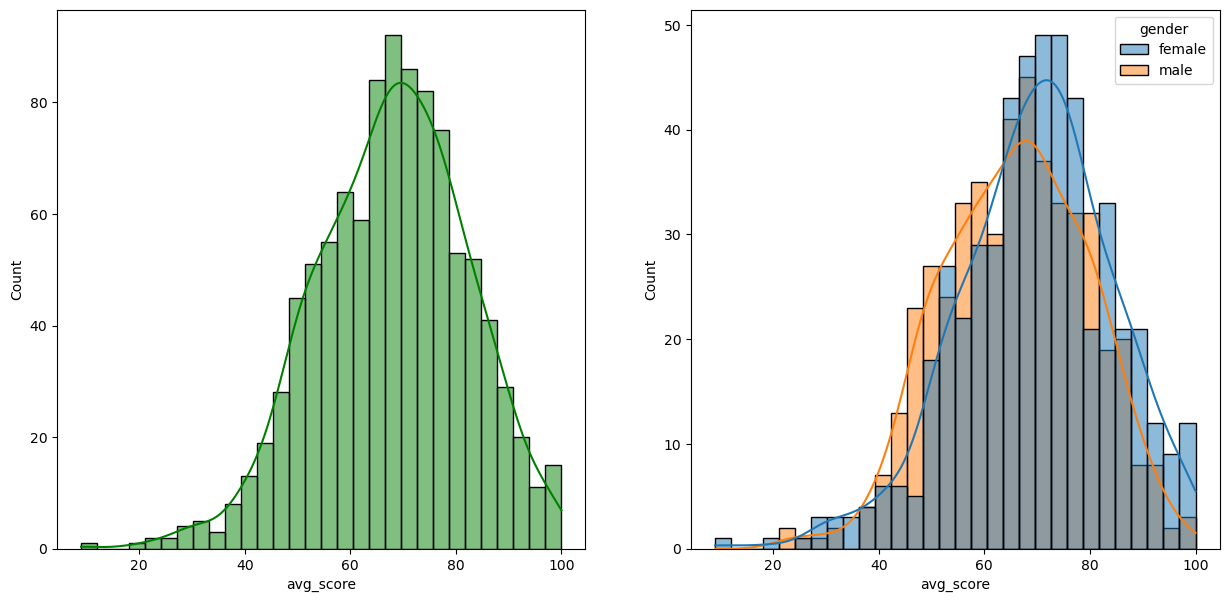

In [32]:
fig,axis = plt.subplots(1,2 ,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x= 'avg_score',bins = 30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data = df,x = 'avg_score',bins = 30,kde = True,hue = 'gender')

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

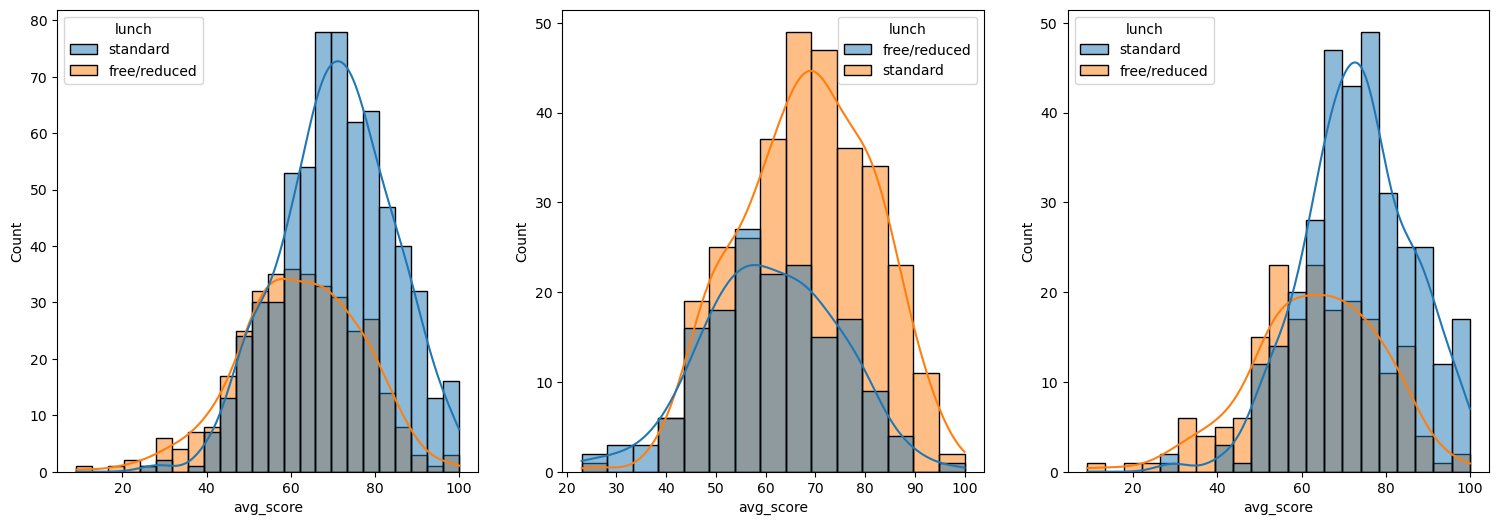

In [51]:
# observing the avg_score acccoding to lunch
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df,x = 'avg_score',kde = True,hue = 'lunch')

plt.subplot(142)
sns.histplot(data = df[df.gender=='male'],x = 'avg_score',kde = True,hue= 'lunch')

plt.subplot(143)
sns.histplot(data = df[df.gender == 'female'],x = 'avg_score',kde = True,hue = 'lunch')

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

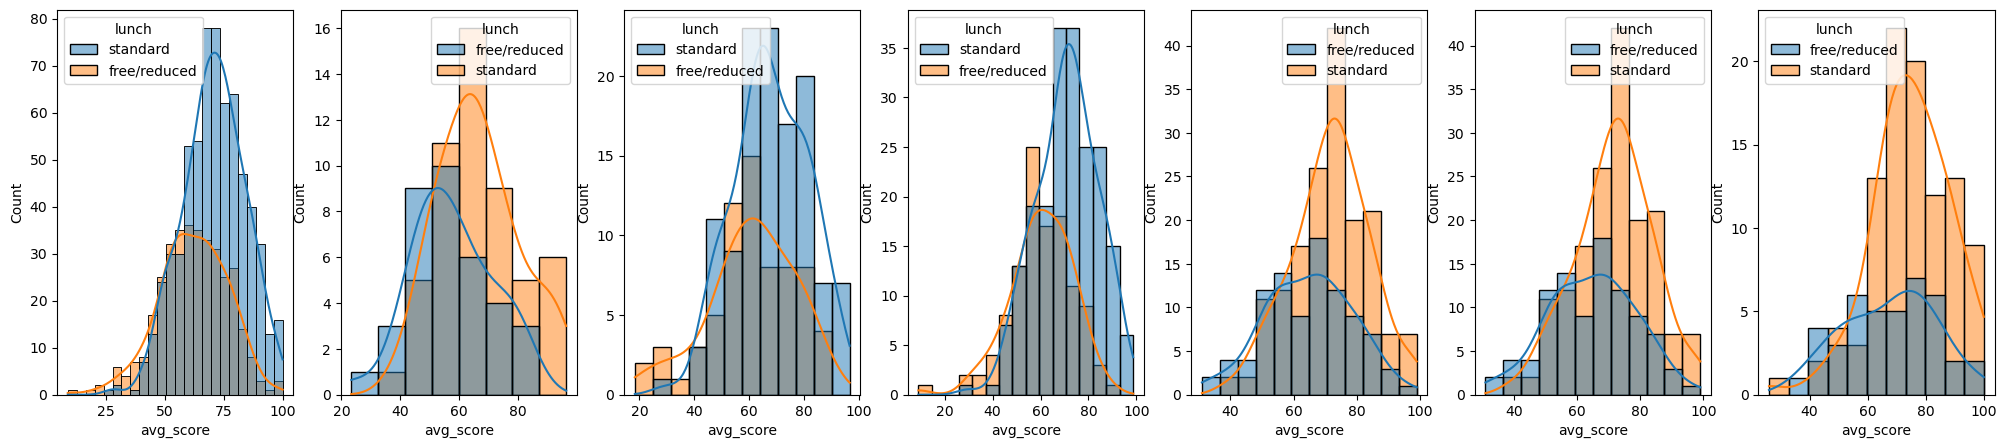

In [87]:
# calcuting the avg_score according to 'race_ethnicity'
plt.subplots(1,6,figsize = (25,5))
plt.subplot(171)
sns.histplot(data = df,x = 'avg_score',kde = True,hue='lunch')

plt.subplot(172)
sns.histplot(data = df[df.race_ethnicity=='group A'],x ='avg_score',kde = True,hue='lunch')

plt.subplot(173)
sns.histplot(data = df[df.race_ethnicity=='group B'],x ='avg_score',kde = True,hue='lunch')

plt.subplot(174)
sns.histplot(data = df[df.race_ethnicity=='group C'],x ='avg_score',kde = True,hue='lunch')

plt.subplot(175)
sns.histplot(data = df[df.race_ethnicity=='group D'],x ='avg_score',kde = True,hue='lunch')

plt.subplot(176)
sns.histplot(data = df[df.race_ethnicity=='group D'],x ='avg_score',kde = True,hue ='lunch')

plt.subplot(177)
sns.histplot(data = df[df.race_ethnicity=='group E'],x ='avg_score',kde = True,hue='lunch')